# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.patches as mpatches
plt.style.use('ggplot')

# **Reading the Datasets**

In [2]:
def datasets():
    #Training Dataset
    train = pd.read_csv("../input/pred-student-perf-without-competiton-env/train.csv")
    #Importing Training Labels
    labels = pd.read_csv("../input/pred-student-perf-without-competiton-env/train_labels.csv")
    #Test Dataset
    test = pd.read_csv("../input/pred-student-perf-without-competiton-env/test.csv")
    return train, labels, test

In [3]:
train_df, labels_df, test_df = datasets()

# ***Essential Information about Data***

> Let's explore the train dataset and look at some key insight.

In [4]:
train_df.head(10)

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,NaN,NaN,NaN,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
5,20090312431273200,5,3423,person_click,basic,0,NaN,-412.991405,-157.314686,381.0,492.0,NaN,"Sure thing, Jo. Grab your notebook and come up...",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
6,20090312431273200,6,5197,person_click,basic,0,NaN,478.485079,-199.971679,593.0,485.0,NaN,"See you later, Teddy.",teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,NaN,NaN,NaN,0-4
7,20090312431273200,7,6180,person_click,basic,0,NaN,503.355128,-168.619913,609.0,453.0,NaN,I get to go to Gramps's meeting!,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,NaN,NaN,NaN,0-4
8,20090312431273200,8,7014,person_click,basic,0,NaN,510.733442,-157.720642,615.0,442.0,NaN,Now where did I put my notebook?,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,NaN,NaN,NaN,0-4
9,20090312431273200,9,7946,person_click,basic,0,NaN,512.048005,-153.743631,616.0,438.0,NaN,\u00f0\u0178\u02dc\u00b4,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,NaN,NaN,NaN,0-4


In [5]:
print(train_df.columns)

Index(['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level',
       'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y',
       'hover_duration', 'text', 'fqid', 'room_fqid', 'text_fqid',
       'fullscreen', 'hq', 'music', 'level_group'],
      dtype='object')


In [6]:
train_df = train_df.sort_values(['session_id','elapsed_time'])

In [7]:
train_df[:100]

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,NaN,NaN,NaN,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20090312431273200,95,98859,person_click,basic,2,NaN,277.753433,-166.585120,613.0,444.0,NaN,Could be. But we need evidence!,gramps,tunic.historicalsociety.collection,tunic.historicalsociety.collection.gramps.found,NaN,NaN,NaN,0-4
96,20090312431273200,96,99459,person_click,basic,2,NaN,368.432843,-176.661681,676.0,451.0,NaN,Why don't you head to the Basketball Center an...,gramps,tunic.historicalsociety.collection,tunic.historicalsociety.collection.gramps.found,NaN,NaN,NaN,0-4
97,20090312431273200,97,99958,person_click,basic,2,NaN,368.432120,-176.661922,676.0,451.0,NaN,Sure!,gramps,tunic.historicalsociety.collection,tunic.historicalsociety.collection.gramps.found,NaN,NaN,NaN,0-4
98,20090312431273200,98,100713,person_click,basic,2,NaN,400.098469,-176.662028,698.0,451.0,NaN,I'll be at the Capitol. Let me know if you fin...,gramps,tunic.historicalsociety.collection,tunic.historicalsociety.collection.gramps.found,NaN,NaN,NaN,0-4


In [8]:
train_df.describe()

,session_id,index,elapsed_time,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,fullscreen,hq,music
count,1.317421e+07,1.317421e+07,1.317421e+07,1.317421e+07,284746.000000,1.213797e+07,1.213797e+07,1.213797e+07,1.213797e+07,1.000737e+06,0.0,0.0,0.0
mean,2.113413e+16,6.526426e+02,3.846817e+06,1.219194e+01,3.157930,-5.493615e+01,-1.162997e+02,4.581144e+02,3.852363e+02,3.186237e+03,NaN,NaN,NaN
std,5.665220e+14,6.275818e+02,2.701387e+07,6.499188e+00,2.064042,5.201468e+02,2.185912e+02,2.472144e+02,1.292879e+02,3.692265e+05,NaN,NaN,NaN
min,2.009031e+16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.992355e+03,-9.181587e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,2.101031e+16,2.890000e+02,4.394300e+05,6.000000e+00,1.000000,-3.529376e+02,-2.128361e+02,2.690000e+02,3.040000e+02,1.000000e+02,NaN,NaN,NaN
50%,2.104022e+16,5.960000e+02,1.013425e+06,1.300000e+01,3.000000,-1.116317e+01,-9.778151e+01,4.470000e+02,3.970000e+02,4.180000e+02,NaN,NaN,NaN
75%,2.110051e+16,8.970000e+02,1.740050e+06,1.800000e+01,5.000000,2.963618e+02,2.268531e+01,6.630000e+02,4.710000e+02,1.266000e+03,NaN,NaN,NaN
max,2.210022e+16,2.047300e+04,1.749293e+09,2.200000e+01,6.000000,1.261774e+03,5.436164e+02,1.916000e+03,1.439000e+03,2.199078e+08,NaN,NaN,NaN


> Data Types of each Column

In [9]:
print(train_df.dtypes)

session_id          int64
index               int64
elapsed_time        int64
event_name         object
name               object
level               int64
page              float64
room_coor_x       float64
room_coor_y       float64
screen_coor_x     float64
screen_coor_y     float64
hover_duration    float64
text               object
fqid               object
room_fqid          object
text_fqid          object
fullscreen        float64
hq                float64
music             float64
level_group        object
dtype: object


> Number of Rows and Columns in the dataset

In [10]:
no_rows, no_columns = train_df.shape
print(f"Training Data Rows and Columns Information \nNumber of Rows: {no_rows}\nNumber of Columns: {no_columns}")

Training Data Rows and Columns Information 
Number of Rows: 13174211
Number of Columns: 20


> The train.csv file is more than 2 GB, so this is a quite big dataset.
> There are 13174211 rows, and 20 columns

In [11]:
print("Data Type Information about Training Data")
print(train_df.info())

Data Type Information about Training Data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13174211 entries, 0 to 13174210
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      int64  
 1   index           int64  
 2   elapsed_time    int64  
 3   event_name      object 
 4   name            object 
 5   level           int64  
 6   page            float64
 7   room_coor_x     float64
 8   room_coor_y     float64
 9   screen_coor_x   float64
 10  screen_coor_y   float64
 11  hover_duration  float64
 12  text            object 
 13  fqid            object 
 14  room_fqid       object 
 15  text_fqid       object 
 16  fullscreen      float64
 17  hq              float64
 18  music           float64
 19  level_group     object 
dtypes: float64(9), int64(4), object(7)
memory usage: 2.1+ GB
None


In [12]:
print(train_df.shape[0])
print(train_df.shape[1])

13174211
20


In [13]:
print("nan values in Training Data", train_df.isna().sum().sort_values(ascending=True))

nan values in Training Data session_id               0
room_fqid                0
level                    0
name                     0
level_group              0
elapsed_time             0
index                    0
event_name               0
room_coor_x        1036240
room_coor_y        1036240
screen_coor_y      1036240
screen_coor_x      1036240
fqid               4159648
text_fqid          8367266
text               8367320
hover_duration    12173474
page              12889465
music             13174211
fullscreen        13174211
hq                13174211
dtype: int64


> There are huge number of nan values in the dataset. Column Music, Fullscreen, and Hq have more than 13 million nan values, whereas column Hover Duration and Page have more than 12 million nan values.

In [14]:
print("null Values in Training Data", train_df.isnull().sum().sort_values(ascending=True))

null Values in Training Data session_id               0
room_fqid                0
level                    0
name                     0
level_group              0
elapsed_time             0
index                    0
event_name               0
room_coor_x        1036240
room_coor_y        1036240
screen_coor_y      1036240
screen_coor_x      1036240
fqid               4159648
text_fqid          8367266
text               8367320
hover_duration    12173474
page              12889465
music             13174211
fullscreen        13174211
hq                13174211
dtype: int64


> Missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.

In [15]:
events = train_df["event_name"].unique()
print("All listed Events in Training Data are:", events)

All listed Events in Training Data are: ['cutscene_click' 'person_click' 'navigate_click' 'observation_click'
 'notification_click' 'object_click' 'object_hover' 'map_hover'
 'map_click' 'checkpoint' 'notebook_click']


> The number of unique events in train.csv are 11.

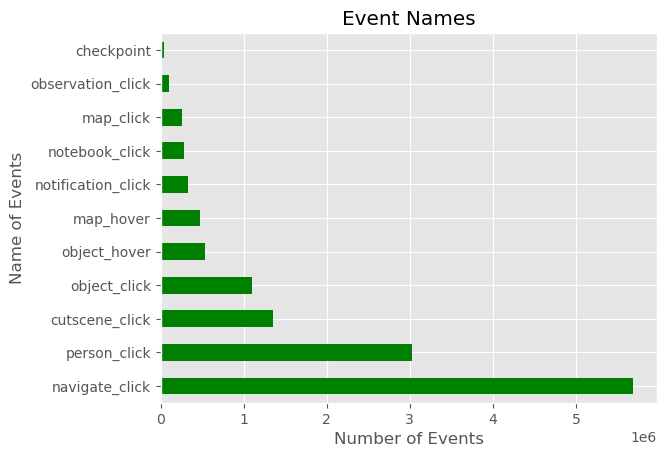

In [16]:
eve = train_df["event_name"].value_counts().plot(kind='barh', title = "Event Names", color = 'green')
eve.set_xlabel("Number of Events")
eve.set_ylabel("Name of Events")
plt.show()

In [17]:
names = train_df["name"].unique()
print("Name in Training Data are:", names)
names = train_df["name"].value_counts().sort_values(ascending=True)
print(names)

Name in Training Data are: ['basic' 'undefined' 'close' 'open' 'prev' 'next']
next            5838
prev            9834
open          118125
close         339093
basic        6324016
undefined    6377305
Name: name, dtype: int64


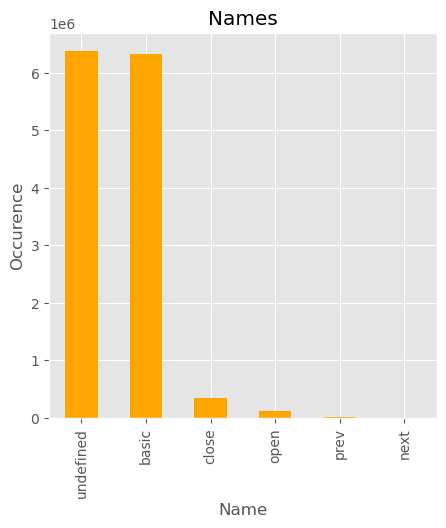

In [18]:
plt.figure(figsize = (5, 5))
eve = train_df["name"].value_counts().plot(kind='bar', title = "Names", color = 'orange')
eve.set_xlabel("Name")
eve.set_ylabel("Occurence")
plt.show()

In [19]:
lev = train_df["level"].unique()
print("Levels in Training Data are:", lev)
lev = train_df["level"].value_counts().sort_values(ascending=True)
print(lev)

Levels in Training Data are: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
12     183800
22     212145
4      214292
10     226174
14     272108
5      333652
0      345275
1      364343
13     411319
8      445325
2      495563
20     565933
9      568681
3      575214
17     603008
19     607286
15     611574
7      638179
16     648472
11     972085
21    1056593
6     1065231
18    1757959
Name: level, dtype: int64


> There are 23 levels in the dataset, that range from 0 to 22

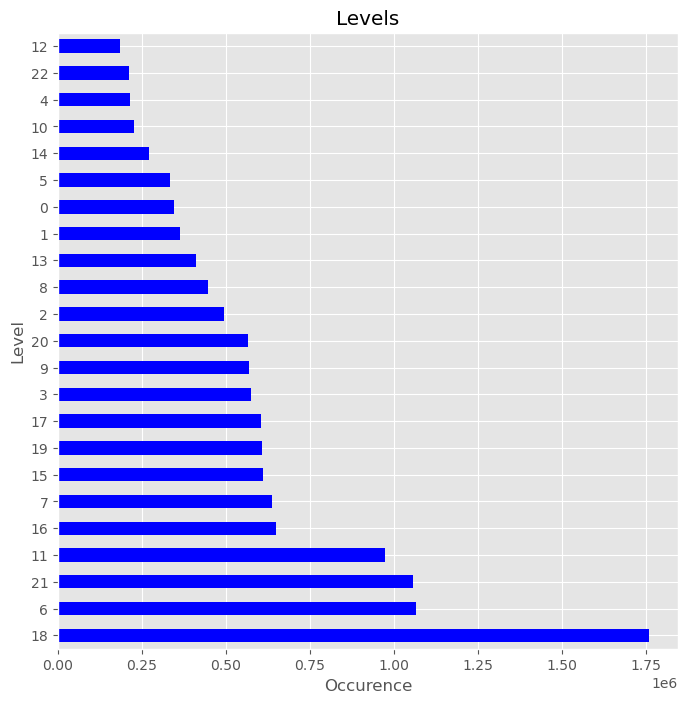

In [20]:
plt.figure(figsize = (8, 8))
lev = train_df["level"].value_counts().plot(kind='barh', title = "Levels", color = 'blue')
lev.set_xlabel("Occurence")
lev.set_ylabel("Level")
plt.show()

In [21]:
tim = train_df["level_group"].unique()
print("Name in Training Data are:", tim)
tim = train_df["level_group"].value_counts()
print(tim)

Name in Training Data are: ['0-4' '5-12' '13-22']
13-22    6746397
5-12     4433127
0-4      1994687
Name: level_group, dtype: int64


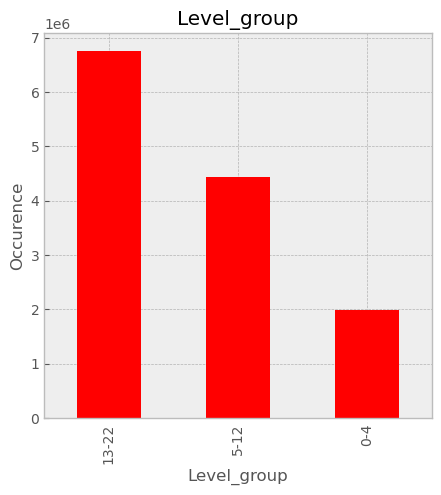

In [22]:
plt.figure(figsize = (5, 5))
plt.style.use('bmh')
lev = train_df["level_group"].value_counts().plot(kind='bar', title = "Level_group", color = 'red')
lev.set_xlabel("Level_group")
lev.set_ylabel("Occurence")
plt.show()

In [23]:
f_qid = train_df["elapsed_time"].unique()
print("Name in Training Data are:", f_qid)
f_qid = train_df["elapsed_time"].value_counts().sort_index(ascending=True)
print(f_qid)

Name in Training Data are: [      0     831    1147 ... 5485166 5486753 5487952]
0             11781
1                 4
2                 4
3                 3
5                 1
              ...  
1749287498        1
1749289247        1
1749291347        1
1749292131        1
1749293395        1
Name: elapsed_time, Length: 3804019, dtype: int64


In [24]:
from sklearn import preprocessing

normalized_arr = preprocessing.normalize([train_df.elapsed_time])
print(normalized_arr)

[[0.00000000e+00 8.39059342e-09 1.15812403e-08 ... 5.53912143e-05
  5.53996554e-05 5.54117616e-05]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


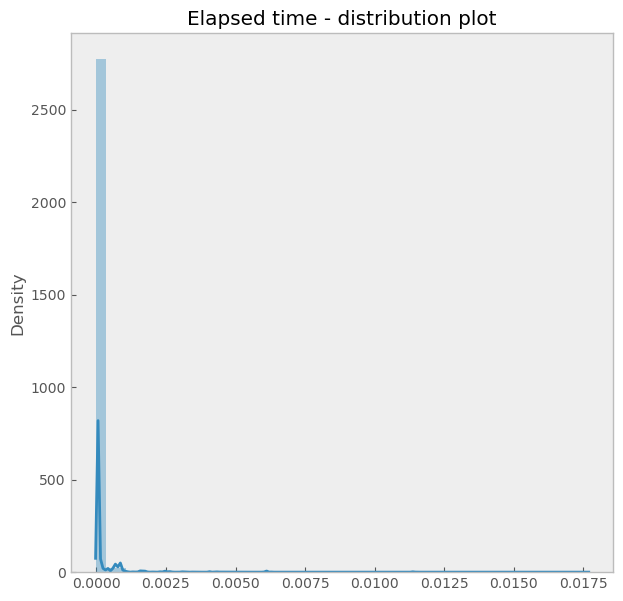

In [25]:
plt.figure(figsize = (7, 7))
sns.distplot(normalized_arr)

plt.grid()
plt.title("Elapsed time - distribution plot")
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


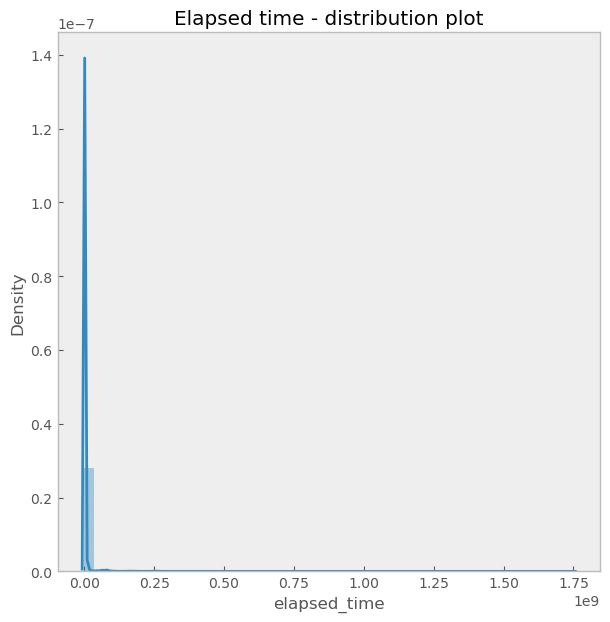

In [26]:
plt.figure(figsize = (7, 7))
sns.distplot(train_df.elapsed_time[::100])

plt.grid()
plt.title("Elapsed time - distribution plot")
plt.show()

0           20090312431273200
2           20090312431273200
3           20090312431273200
1           20090312431273200
4           20090312431273200
                  ...        
13174206    22100221145014656
13174207    22100221145014656
13174208    22100221145014656
13174209    22100221145014656
13174210    22100221145014656
Name: session_id, Length: 13174211, dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


Text(0.5, 1.0, 'Session ID')

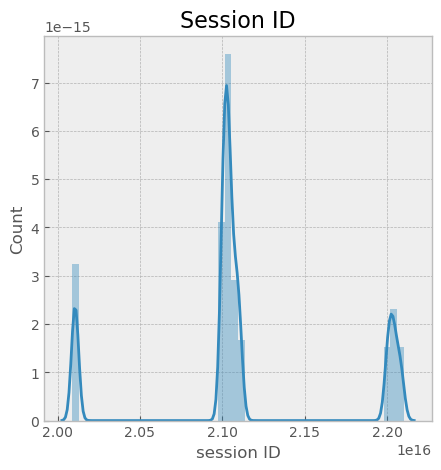

In [27]:
plt.figure(figsize=(5, 5))

session_id = train_df["session_id"]
print(session_id)
sns.distplot(session_id, kde=True)
plt.xlabel("session ID", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Session ID", fontsize=16)


# **Exploring the Labels csv**

In [28]:
labels_df.head(10)

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090314121766812_q1,1
3,20090314363702160_q1,1
4,20090314441803444_q1,1
5,20090315081004164_q1,0
6,20090315085850788_q1,1
7,20090315101457836_q1,1
8,20090315170769824_q1,1
9,20090317080721164_q1,0


<AxesSubplot:>

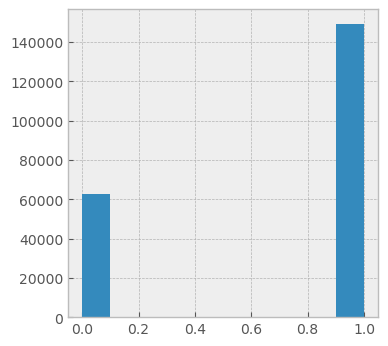

In [29]:
plt.figure(figsize = (4, 4))

labels_df['correct'].hist()

> From the above graph it is visible that the data is imbalanced.